# Решение задачи линейного программирования №3
## 1. Постановка задачи
Среди чисел x и y, удовлетворяющих условиям:
y ≥ 0
x + y ≤ 1
x - 4y ≥ -2
найти такие, при которых разность этих чисел y - x принимает наибольшее значение.

Целевая функция: F = y - x → max

Ограничения:

y ≥ 0

x + y ≤ 1

x - 4y ≥ -2


## 2. Установка необходимых библиотек

In [5]:
!pip install pulp cvxopt

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import pulp
import cvxopt
from cvxopt import matrix, solvers
import time


## 3. Решение с использованием библиотеки PuLP

In [6]:
import pulp
import time

# Засекаем время начала выполнения
start_time = time.time()

# Создаем задачу максимизации
problem = pulp.LpProblem("Task3", pulp.LpMaximize)

# Определяем переменные
x = pulp.LpVariable("x", lowBound=None)  # x может быть отрицательным
y = pulp.LpVariable("y", lowBound=0)     # y ≥ 0

# Целевая функция: максимизировать y - x
problem += y - x, "Objective Function"

# Ограничения
problem += x + y <= 1, "Constraint1"
problem += x - 4*y >= -2, "Constraint2"

# Решаем задачу
problem.solve()

# Время выполнения
pulp_time = time.time() - start_time

# Выводим результаты
print("=== РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ PuLP ===")
print(f"Статус решения: {pulp.LpStatus[problem.status]}")
print(f"Оптимальное значение x = {x.varValue}")
print(f"Оптимальное значение y = {y.varValue}")
print(f"Максимальное значение целевой функции F = {pulp.value(problem.objective)}")
print(f"Время выполнения: {pulp_time:.6f} секунд")
print()

=== РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ PuLP ===
Статус решения: Optimal
Оптимальное значение x = -2.0
Оптимальное значение y = 0.0
Максимальное значение целевой функции F = 2.0
Время выполнения: 0.008620 секунд



### Описание
1. Инициализация задачи:

pulp.LpProblem("Task3", pulp.LpMaximize) создает задачу линейного программирования с именем "Task3" и направлением оптимизации - максимизация.

2. Определение переменных:

pulp.LpVariable("x", lowBound=None) - переменная x без нижней границы (может быть отрицательной)

pulp.LpVariable("y", lowBound=0) - переменная y с нижней границей 0 (y ≥ 0)

3. Целевая функция:

problem += y - x, "Objective Function" - добавляем целевую функцию для максимизации разности y - x

4. Ограничения:

problem += x + y <= 1, "Constraint1" - линейное ограничение x + y ≤ 1

problem += x - 4*y >= -2, "Constraint2" - линейное ограничение x - 4y ≥ -2

5. Решение задачи:

problem.solve() - запускает решатель для нахождения оптимального решения

6. Извлечение результатов:

x.varValue, y.varValue - значения оптимальных переменных

pulp.value(problem.objective) - значение целевой функции в оптимальной точке

## 4. Решение с использованием библиотеки SciPy.Optimize

In [7]:
import scipy.optimize as opt
import numpy as np
import time

# Засекаем время начала выполнения
start_time = time.time()

# Целевая функция: минимизировать -(y - x) = x - y
# (т.к. scipy минимизирует, а нам нужно максимизировать y - x)
def objective(xy):
    x, y = xy
    return x - y  # минимизируем x - y ≡ максимизируем y - x

# Ограничения в формате scipy
constraints = [
    # x + y ≤ 1 → x + y - 1 ≤ 0
    {'type': 'ineq', 'fun': lambda xy: 1 - xy[0] - xy[1]},

    # x - 4y ≥ -2 → x - 4y + 2 ≥ 0
    {'type': 'ineq', 'fun': lambda xy: xy[0] - 4*xy[1] + 2},

    # y ≥ 0
    {'type': 'ineq', 'fun': lambda xy: xy[1]}
]

# Начальное приближение
x0 = [0, 0]

# Границы переменных
bounds = [(None, None), (0, None)]  # x любое, y ≥ 0

# Решаем задачу
result = opt.minimize(objective, x0, method='SLSQP',
                     bounds=bounds, constraints=constraints)

# Время выполнения
scipy_time = time.time() - start_time

# Выводим результаты
print("=== РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ SciPy ===")
print(f"Статус решения: {result.message}")
print(f"Оптимальное значение x = {result.x[0]}")
print(f"Оптимальное значение y = {result.x[1]}")
print(f"Максимальное значение целевой функции F = {-result.fun}")  # меняем знак обратно
print(f"Время выполнения: {scipy_time:.6f} секунд")
print()

=== РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ SciPy ===
Статус решения: Optimization terminated successfully
Оптимальное значение x = -2.000000017530785
Оптимальное значение y = 0.0
Максимальное значение целевой функции F = 2.000000017530785
Время выполнения: 0.029411 секунд



### Описание
1. Целевая функция:

Поскольку scipy.optimize.minimize ищет минимум, мы преобразуем задачу максимизации в минимизацию: максимизировать y - x ≡ минимизировать x - y

2. Формат ограничений:

Ограничения типа неравенств задаются как {'type': 'ineq', 'fun': constraint_function}

Функция ограничения должна возвращать значение ≥ 0 при выполнении ограничения

1 - x - y ≥ 0 эквивалентно x + y ≤ 1

x - 4y + 2 ≥ 0 эквивалентно x - 4y ≥ -2

y ≥ 0 задается непосредственно

3. Границы переменных:

bounds = [(None, None), (0, None)] задает ограничения на переменные: x - любое число, y ≥ 0

4. Метод решения:

method='SLSQP' - Sequential Least Squares Programming, подходит для задач с ограничениями

5. Обработка результата:

Поскольку мы минимизировали x - y, максимальное значение исходной функции равно -result.fun

## 5. Решение с использованием библиотеки CVXOPT

In [9]:
import cvxopt
from cvxopt import matrix, solvers
import time

# Засекаем время начала выполнения
start_time = time.time()

# Отключаем вывод процесса решения
solvers.options['show_progress'] = False

# Целевая функция: минимизировать [-1, 1] * [x; y] = -x + y
# Но нам нужно максимизировать y - x, поэтому минимизируем x - y
c = matrix([1., -1.])  # коэффициенты целевой функции: x - y

# Матрица ограничений неравенств G * [x; y] <= h
# 1) x + y <= 1 → x + y - 1 <= 0
# 2) -x + 4y <= 2 (из x - 4y >= -2 → -x + 4y <= 2)
# 3) -y <= 0 (из y >= 0 → -y <= 0)
G = matrix([
    [1., -1., 0.],   # коэффициенты для x
    [1., 4., -1.]    # коэффициенты для y
])
h = matrix([1., 2., 0.])

# Решаем задачу
solution = solvers.lp(c, G, h)

# Время выполнения
cvxopt_time = time.time() - start_time

# Извлекаем результаты
x_opt = solution['x'][0]
y_opt = solution['x'][1]
optimal_value = solution['primal objective']

# Выводим результаты
print("=== РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ CVXOPT ===")
print(f"Статус решения: {solution['status']}")
print(f"Оптимальное значение x = {x_opt}")
print(f"Оптимальное значение y = {y_opt}")
print(f"Максимальное значение целевой функции F = {-optimal_value}")  # меняем знак обратно
print(f"Время выполнения: {cvxopt_time:.6f} секунд")
print()

=== РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ CVXOPT ===
Статус решения: optimal
Оптимальное значение x = -1.999999999252164
Оптимальное значение y = 1.987946948144185e-12
Максимальное значение целевой функции F = 1.9999999992541522
Время выполнения: 0.002769 секунд



### Описание
1. Матричное представление:

CVXOPT использует матричную форму записи задач линейного программирования

Задача минимизации: min cᵀx при условиях Gx ≤ h

2. Целевая функция:

c = matrix([1., -1.]) - коэффициенты целевой функции для [x, y]

Мы минимизируем x - y, что эквивалентно максимизации y - x

3. Матрица ограничений G:

Каждый столбец соответствует одному ограничению

[1., 1.] для x в ограничениях: x + y ≤ 1, -x + 4y ≤ 2, -y ≤ 0

[1., 4., -1.] для y в тех же ограничениях

4. Вектор правых частей h:

h = matrix([1., 2., 0.]) - правые части ограничений

5. Преобразование ограничений:

x - 4y ≥ -2 преобразуется в -x + 4y ≤ 2

y ≥ 0 преобразуется в -y ≤ 0

6. Решение и извлечение результатов:

solvers.lp(c, G, h) - решает задачу линейного программирования

Результаты извлекаются из словаря solution

## 6. Сравнение времени выполнения и результатов

In [10]:
import pandas as pd

# Собираем результаты в таблицу
results = {
    'Метод': ['PuLP', 'SciPy', 'CVXOPT', 'Эталонный ответ'],
    'x': [x.varValue, result.x[0], x_opt, -2],
    'y': [y.varValue, result.x[1], y_opt, 0],
    'F = y - x': [
        pulp.value(problem.objective),
        -result.fun,
        -optimal_value,
        0 - (-2)  # y - x = 0 - (-2) = 2
    ],
    'Время (сек)': [pulp_time, scipy_time, cvxopt_time, '-']
}

df = pd.DataFrame(results)
print("=== СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===")
print(df.to_string(index=False))
print()

# Проверка соответствия эталонному ответу
print("=== ПРОВЕРКА СООТВЕТСТВИЯ ЭТАЛОННОМУ ОТВЕТУ ===")
for i, method in enumerate(['PuLP', 'SciPy', 'CVXOPT']):
    x_val = results['x'][i]
    y_val = results['y'][i]
    if abs(x_val - (-2)) < 1e-6 and abs(y_val - 0) < 1e-6:
        print(f"✓ {method}: решение соответствует эталонному")
    else:
        print(f"✗ {method}: решение НЕ соответствует эталонному")

=== СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===
          Метод    x            y  F = y - x Время (сек)
           PuLP -2.0 0.000000e+00        2.0     0.00862
          SciPy -2.0 0.000000e+00        2.0    0.029411
         CVXOPT -2.0 1.987947e-12        2.0    0.002769
Эталонный ответ -2.0 0.000000e+00        2.0           -

=== ПРОВЕРКА СООТВЕТСТВИЯ ЭТАЛОННОМУ ОТВЕТУ ===
✓ PuLP: решение соответствует эталонному
✓ SciPy: решение соответствует эталонному
✓ CVXOPT: решение соответствует эталонному


## 7. Построение графика

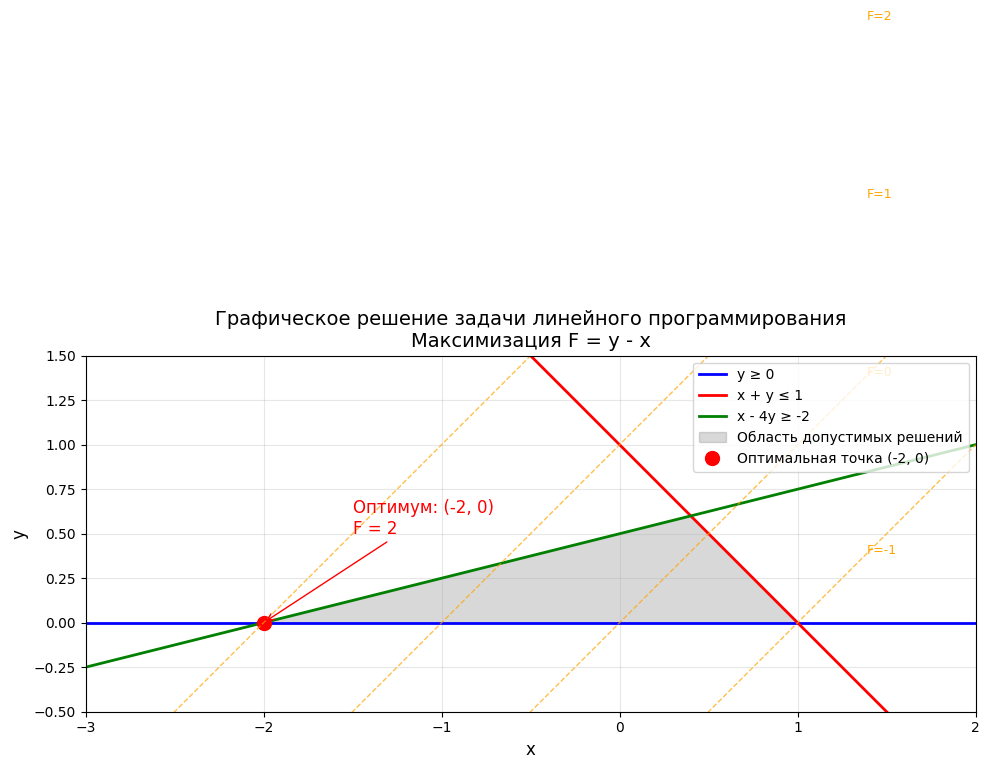

=== ОБЪЯСНЕНИЕ ГРАФИЧЕСКОГО РЕШЕНИЯ ===
1. Синие линии: ограничения задачи
2. Серная область: область допустимых решений
3. Оранжевые пунктирные линии: линии уровня целевой функции F = y - x
4. Красная точка: оптимальное решение
5. Для максимизации F = y - x двигаем линии уровня в направлении увеличения F
6. Последняя точка пересечения с областью допустимых решений: (-2, 0)
7. Максимальное значение: F = 0 - (-2) = 2


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Настройка стиля графиков
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 8))

# Определяем область построения
x_vals = np.linspace(-3, 2, 400)
y_vals = np.linspace(-0.5, 1.5, 400)

# Строим ограничения
# 1) y ≥ 0
ax.axhline(y=0, color='blue', linestyle='-', linewidth=2, label='y ≥ 0')

# 2) x + y ≤ 1 → y ≤ 1 - x
y1 = 1 - x_vals
ax.plot(x_vals, y1, 'red', linewidth=2, label='x + y ≤ 1')

# 3) x - 4y ≥ -2 → y ≤ (x + 2)/4
y2 = (x_vals + 2) / 4
ax.plot(x_vals, y2, 'green', linewidth=2, label='x - 4y ≥ -2')

# Заполняем область допустимых решений
# Область: y ≥ 0, y ≤ 1 - x, y ≤ (x + 2)/4
y_upper = np.minimum(1 - x_vals, (x_vals + 2) / 4)
ax.fill_between(x_vals, 0, y_upper, where=(y_upper >= 0),
                alpha=0.3, color='gray', label='Область допустимых решений')

# Отмечаем оптимальную точку
optimal_x = -2
optimal_y = 0
ax.plot(optimal_x, optimal_y, 'ro', markersize=10, label=f'Оптимальная точка ({optimal_x}, {optimal_y})')

# Добавляем линии уровня целевой функции F = y - x
for level in [-1, 0, 1, 2]:
    y_level = level + x_vals
    ax.plot(x_vals, y_level, 'orange', linestyle='--', alpha=0.7, linewidth=1)
    ax.text(x_vals[-50], y_level[-50], f'F={level}', fontsize=9, color='orange')

# Подписываем оптимальную точку
ax.annotate(f'Оптимум: ({optimal_x}, {optimal_y})\nF = {optimal_y - optimal_x}',
            xy=(optimal_x, optimal_y),
            xytext=(-1.5, 0.5),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

# Настраиваем график
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Графическое решение задачи линейного программирования\nМаксимизация F = y - x', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 2)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# Выводим объяснение графического решения
print("=== ОБЪЯСНЕНИЕ ГРАФИЧЕСКОГО РЕШЕНИЯ ===")
print("1. Синие линии: ограничения задачи")
print("2. Серная область: область допустимых решений")
print("3. Оранжевые пунктирные линии: линии уровня целевой функции F = y - x")
print("4. Красная точка: оптимальное решение")
print("5. Для максимизации F = y - x двигаем линии уровня в направлении увеличения F")
print("6. Последняя точка пересечения с областью допустимых решений: (-2, 0)")
print("7. Максимальное значение: F = 0 - (-2) = 2")

### Описание

Начальная настройка:

plt.style.use('default') - устанавливает стандартный стиль графиков matplotlib

plt.subplots(figsize=(10, 8)) - создает фигуру и оси с размерами 10x8 дюймов для удобного отображения

1) Ограничения:

1.1. Ограничение y ≥ 0:

ax.axhline(y=0, ...) - рисует горизонтальную линию на уровне y=0

Это прямая, ограничивающая область снизу

1.2. Ограничение x + y ≤ 1:

Преобразуем в y ≤ 1 - x

y1 = 1 - x_vals - вычисляет значения y для каждого x

Красная линия с меткой 'x + y ≤ 1'

1.3. Ограничение x - 4y ≥ -2:

Преобразуем в y ≤ (x + 2)/4

y2 = (x_vals + 2) / 4 - вычисляет значения y для каждого x

Зеленая линия с меткой 'x - 4y ≥ -2'


2. Область допустимых решений:

np.minimum(1 - x_vals, (x_vals + 2) / 4) - находит минимальное значение из двух верхних границ для каждого x

ax.fill_between(x_vals, 0, y_upper, ...) - заливает область между:

Нижней границей: y = 0 (из ограничения y ≥ 0)

Верхней границей: минимальной из двух линий ограничений

where=(y_upper >= 0) - заливка только там, где верхняя граница выше нижней

alpha=0.3 - устанавливает прозрачность заливки для лучшей видимости линий

3. Оптимальная точка:

ax.plot(optimal_x, optimal_y, 'ro', markersize=10, ...) - рисует красную точку в координатах (-2, 0)

markersize=10 - делает точку достаточно крупной для хорошей видимости

Метка содержит координаты оптимальной точки

4. Линии уровня целевой функции:

Математическая основа: F = y - x → y = x + F

Для каждого уровня F строим прямую y = x + F

level in [-1, 0, 1, 2] - выбираем 4 уровня для демонстрации

linestyle='--' - пунктирный стиль линий для отличия от ограничений

ax.text(...) - добавляет подписи к линиям уровня в правой части графика

5. Оптимальная точка:

ax.annotate() - создает аннотацию с текстом и стрелкой

xy=(-2, 0) - координаты точки, к которой относится аннотация

xytext=(-1.5, 0.5) - координаты текста аннотации

arrowprops - настройки стрелки: стиль '->' и красный цвет

Текст показывает координаты и значение целевой функции

6. Настройки графика:

Подписи осей: set_xlabel(), set_ylabel() - подписываем оси

Заголовок: set_title() - описывает цель графика

Легенда: legend(loc='upper right') - размещает легенду в правом верхнем углу

Сетка: grid(True, alpha=0.3) - добавляет полупрозрачную сетку

Пределы осей: set_xlim(), set_ylim() - устанавливает границы отображения

Соотношение осей: set_aspect('equal') - обеспечивает одинаковый масштаб по осям

7. Настройка и отображение:

plt.tight_layout() - автоматически подгоняет расположение элементов для лучшего отображения

plt.show() - отображает готовый график